In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
%matplotlib inline
sns.set()
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # just nice formatting

# keywords used: funny cats, cat compilation, cat videos, cats

# read data in
df = pd.read_csv('cat_test_results_trial.csv')
df.head(1)

,Index,tags,channelId,channelTitle,categoryId,title,videoId,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,thumbnails,descriptions,search_query
0,0,"['rufus', 'funny cat videos', 'cute cat videos...",UCzn2gx8zzhF0A4Utk8TEDNQ,Rufus,15,Cute and Funny Cat Videos to Keep You Smiling! 🐱,tpiyEe_CqB4,6186110.00,44767.00,4833.00,3028.00,0,{'default': {'url': 'https://i.ytimg.com/vi/tp...,hi hoomans! im rufus p goodboy and dis my yoot...,cat videos


In [2]:
# quick examine data columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29636 entries, 0 to 29635
Data columns (total 15 columns):
Index            29636 non-null int64
tags             26078 non-null object
channelId        29636 non-null object
channelTitle     29636 non-null object
categoryId       29636 non-null int64
title            29636 non-null object
videoId          29636 non-null object
viewCount        29580 non-null float64
likeCount        29324 non-null float64
dislikeCount     29324 non-null float64
commentCount     26937 non-null float64
favoriteCount    29636 non-null int64
thumbnails       29636 non-null object
descriptions     29158 non-null object
search_query     29636 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 3.4+ MB


In [3]:
# defining relevant numerical and categorical columns
numerical_cols = ['viewCount', 'likeCount', 'dislikeCount', 'commentCount', 'favoriteCount']
categorical_cols = ['tags', 'channelTitle', 'title', 'descriptions']

In [4]:
# look at descriptive stats of numerical variables
df[numerical_cols].describe()

,viewCount,likeCount,dislikeCount,commentCount,favoriteCount
count,29580.00,29324.00,29324.00,26937.00,29636.00
mean,10832426.82,72944.52,12195.40,3799.85,0.00
std,42778808.89,234174.18,69002.07,18660.95,0.00
min,0.00,0.00,0.00,0.00,0.00
25%,8249.00,103.00,5.00,6.00,0.00
50%,336092.00,3611.00,203.00,89.00,0.00
75%,4864670.00,38299.00,3094.00,1112.00,0.00
max,1542787799.00,3990614.00,1890226.00,522152.00,0.00


In [5]:
# look at descriptive stats of categorical variables
df[categorical_cols].describe(include='all')

,tags,channelTitle,title,descriptions
count,26078,29636,29636,29158
unique,1209,863,1621,1450
top,"['baby cats', 'baby cat', 'cat baby', 'cute ba...",CutieCatCute,Funniest Cats 😹 - Don&#39;t try to hold back L...,"Please watch this, Most Satisfying Moment MSM ..."
freq,649,2035,466,2035


In [6]:
# simple way to get rid of false positives from scraper
df['Relevant'] = df['title'].str.contains('cat|kitten', case=False)
df['Relevant'].value_counts()

True     27384
False     2252
Name: Relevant, dtype: int64

In [7]:
# check which ones are false
df.loc[df['Relevant']==False]['title']

47       Talking Angela - Summer Fun at the Beach with ...
97       Talking Angela - Summer Fun at the Beach with ...
101      Aaron&#39;s Animals NEW VIDEO COMPILATION 2017...
105      Hide and Seek Challenge 🏆 🔹NEW CARTOON🔹Talking...
197      Talking Angela - Summer Fun at the Beach with ...
                               ...                        
29625    Tom &amp; Jerry | Scary Tom &amp; Jerry! | Cla...
29627    Tom &amp; Jerry | Tom &amp; The Two Mouseketee...
29628    Tom &amp; Jerry | Food Fight! | Classic Cartoo...
29630    😺 Sabrina the Animated Series | Best of Salem ...
29634    Tom &amp; Jerry | Say Cheese! | Classic Cartoo...
Name: title, Length: 2252, dtype: object

In [8]:
# only keep relevant
df_processed = df.loc[df['Relevant']==True].dropna().drop(columns='Relevant')
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21477 entries, 0 to 29635
Data columns (total 15 columns):
Index            21477 non-null int64
tags             21477 non-null object
channelId        21477 non-null object
channelTitle     21477 non-null object
categoryId       21477 non-null int64
title            21477 non-null object
videoId          21477 non-null object
viewCount        21477 non-null float64
likeCount        21477 non-null float64
dislikeCount     21477 non-null float64
commentCount     21477 non-null float64
favoriteCount    21477 non-null int64
thumbnails       21477 non-null object
descriptions     21477 non-null object
search_query     21477 non-null object
dtypes: float64(4), int64(3), object(8)
memory usage: 2.6+ MB


       likeCount  dislikeCount
0       44767.00       4833.00
1      100959.00      16171.00
2       73669.00      36282.00
4       70991.00      29300.00
5      464550.00      90168.00
...          ...           ...
29629       1.00          0.00
29631     167.00          6.00
29632    3568.00        160.00
29633      12.00          2.00
29635       0.00          1.00

[21477 rows x 2 columns]


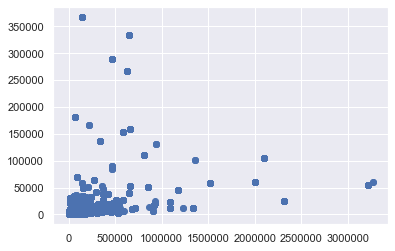

In [9]:
# plot for investigating like and dislike
like_dislike_subset = df_processed[['likeCount', 'dislikeCount']]

print(like_dislike_subset)
plt.scatter(like_dislike_subset['likeCount'], like_dislike_subset['dislikeCount'])
plt.show()

In [10]:
# remove outliers
edited_subset = like_dislike_subset[
    np.abs(like_dislike_subset-like_dislike_subset.mean())<=(3*like_dislike_subset.std())
].dropna()

       likeCount  dislikeCount
0       44767.00       4833.00
1      100959.00      16171.00
2       73669.00      36282.00
4       70991.00      29300.00
6        8669.00        767.00
...          ...           ...
29629       1.00          0.00
29631     167.00          6.00
29632    3568.00        160.00
29633      12.00          2.00
29635       0.00          1.00

[20999 rows x 2 columns]


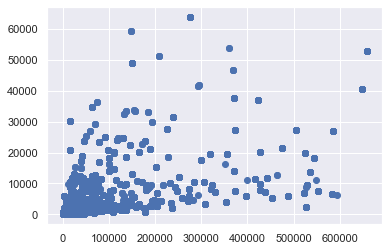

In [11]:
# replot for investigating without outliers
print(edited_subset)
plt.scatter(edited_subset['likeCount'], edited_subset['dislikeCount'])
plt.show()

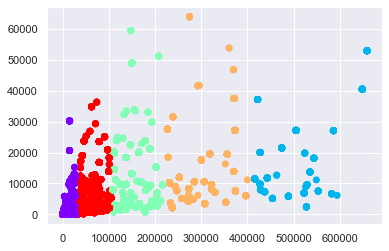

In [12]:
# trying kmeans
kmeans = KMeans(5)
kmeans.fit(edited_subset)
identified_clusters = kmeans.fit_predict(edited_subset)
data_with_clusters = edited_subset.copy()
data_with_clusters['Cluster'] = identified_clusters
plt.scatter(data_with_clusters['likeCount'], data_with_clusters['dislikeCount'], 
            c=data_with_clusters['Cluster'], cmap='rainbow')
plt.show()

In [13]:
# arbitrarily deciding if a video is good or not with like and dislike ratio
# using 36:1 like:dislike (estimate based on fifth rightmost cluster => 550,000/15,000)

df_processed['Quality Metric'] = df_processed['likeCount'] / df_processed['dislikeCount']
df_processed['Quality Metric']

0        9.26
1        6.24
2        2.03
4        2.42
5        5.15
         ... 
29629     inf
29631   27.83
29632   22.30
29633    6.00
29635    0.00
Name: Quality Metric, Length: 21477, dtype: float64

In [23]:
# creating end classification column (1 is good 0 is bad)
df_processed['Quality'] = np.where(df_processed['Quality Metric']>36, 1, 0)
df_processed['Quality']

0        0
1        0
2        0
4        0
5        0
        ..
29629    1
29631    0
29632    0
29633    0
29635    0
Name: Quality, Length: 21477, dtype: int64

In [24]:
df_processed.loc[df_processed['Quality']==1]

,Index,tags,channelId,channelTitle,categoryId,title,videoId,viewCount,likeCount,dislikeCount,commentCount,favoriteCount,thumbnails,descriptions,search_query,Quality Metric,Quality
46,46,"['Bilal Göregen', 'Bilal', 'Göregen', 'müzik',...",UCJKTabEKg3qzzDhddAzJPGA,Bilal Göregen,22,Cat Vibing To Ievan Polkka (Official Video HD)...,NUYvbT6vTPs,12197039.00,901282.00,6223.00,43385.00,0,{'default': {'url': 'https://i.ytimg.com/vi/NU...,Cat Vibing To Ievan Polkka - Street Drummer Wi...,cat videos,144.83,1
96,46,"['Bilal Göregen', 'Bilal', 'Göregen', 'müzik',...",UCJKTabEKg3qzzDhddAzJPGA,Bilal Göregen,22,Cat Vibing To Ievan Polkka (Official Video HD)...,NUYvbT6vTPs,12197039.00,901282.00,6223.00,43385.00,0,{'default': {'url': 'https://i.ytimg.com/vi/NU...,Cat Vibing To Ievan Polkka - Street Drummer Wi...,cat videos,144.83,1
102,2,"['cute couples', 'cute puppies', 'cute', 'funn...",UClpG8a39oAAMNJ1vd8_4uOg,Kapig Home,24,Cute and Funny Cat Videos Compilation,0vGh2rG3iNE,94.00,2.00,0.00,1.00,0,{'default': {'url': 'https://i.ytimg.com/vi/0v...,#Animal #Cute #Puppies\n\nCute and Funny Cat V...,cat videos,inf,1
122,22,"['funny cat videos', 'cute cat videos', 'anima...",UCjDhQK5hSg7JEg8UYG-62AQ,Yufus,15,Try to stay SERIOUS -FUNNIEST And CUTEST CAT V...,Dz3QJmNI0_4,3352.00,86.00,2.00,9.00,0,{'default': {'url': 'https://i.ytimg.com/vi/Dz...,The best and funniest cat videos ever! Get rea...,cat videos,43.00,1
137,37,"['aarons animals', 'aarons', 'animals', 'cat',...",UCNo5PGwGmfnEprEUUb9AGgw,AaronsAnimals,15,How to Make a Cat Video,1Ne1hqOXKKI,6627810.00,145930.00,3861.00,6586.00,0,{'default': {'url': 'https://i.ytimg.com/vi/1N...,A look behind the scenes at Aaron's Animals an...,cat videos,37.80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29609,2,"['video', 'Tiktok', 'compilation', 'compilatio...",UCF_cpRQUDjA2JL6R-_WR2jw,luna,24,MY FAVE CAT VIDS 🐱 pt. 1 | TikTok Compilation,sBXlhPINRHs,5085.00,141.00,1.00,12.00,0,{'default': {'url': 'https://i.ytimg.com/vi/sB...,New video's every week! ✨\n---\nIf you read th...,cat compilation,141.00,1
29614,8,"['Cute and Funny Faces Compilation', 'Bowie Th...",UC3lIanUTuz-QsQT0WT7ZqRg,Bowie The Ragdoll Cat,15,3 minutes Ragdoll Cat&#39;s Cute and Funny Fac...,edb9EdpjrCM,4374.00,169.00,2.00,16.00,0,{'default': {'url': 'https://i.ytimg.com/vi/ed...,Compilation of cute and funny faces from Bowie...,cat compilation,84.50,1
29615,9,"['game grumps', 'gamegrumps', 'compilation', '...",UCNEBRUhjGcQB6fYzBfDaq0w,Game Grumps Compilations,20,The Ultimate Big Cat Compilation - Game Grumps...,XJG3B_R7kX8,337161.00,10063.00,81.00,389.00,0,{'default': {'url': 'https://i.ytimg.com/vi/XJ...,This GameGrumps compilation was made 100% as a...,cat compilation,124.23,1
29624,18,"['Funny', 'Viral', 'Comedy', 'Fun', 'lol', 'Pe...",UCxAO5v1S7xoYCq-S2vR_bMg,DUMBSTORE,15,Funny Crazy Cats Compilation 2017 !!!!!,aAK7qZU48to,719.00,10.00,0.00,0.00,0,{'default': {'url': 'https://i.ytimg.com/vi/aA...,Subscribe for more comedy & funny DUMBSTORE vi...,cat compilation,inf,1


In [25]:
df_processed['Quality'].value_counts()

0    15146
1     6331
Name: Quality, dtype: int64